In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 12.6MB/s 
     |████████████████████████████████| 194kB 52.3MB/s 
     |████████████████████████████████| 1.1MB 47.0MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

ModuleNotFoundError: ignored

In [ ]:
from fastai.vision.all import *
 
path = untar_data(URLs.PETS)
 
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, 
    label_func=is_cat, item_tfms=Resize(224))
 
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.381556,0.254326,0.114344,01:26


epoch,train_loss,valid_loss,error_rate,time
0,0.235765,0.176373,0.077808,01:42


In [ ]:
1+1

2

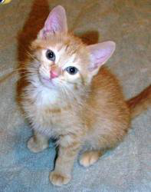

In [ ]:
img = PILImage.create(image_cat())
img.to_thumb(192)

In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probably it's a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probably it's a cat: 0.000058


In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.017612,2.496501,00:01


epoch,train_loss,valid_loss,time
0,1.778396,1.555697,00:01
1,1.512776,1.273314,00:01
2,1.438208,1.289650,00:01
3,1.333823,1.048316,00:01
4,1.204859,0.968363,00:01
5,1.092309,0.911697,00:01
6,0.994709,0.868592,00:01
7,0.919820,0.875895,00:01


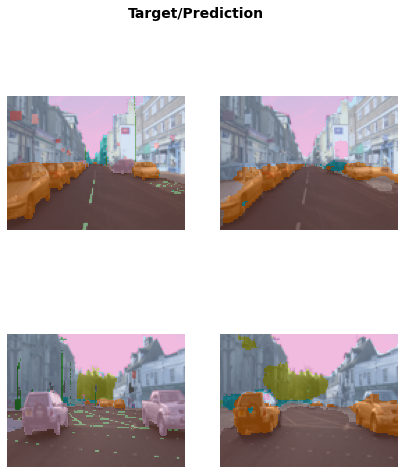

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *
 
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, 
                                drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.606879,0.402588,0.817560,03:40


epoch,train_loss,valid_loss,accuracy,time
0,0.334515,0.274430,0.888640,07:22
1,0.258517,0.205761,0.917960,07:22
2,0.202678,0.189473,0.927480,07:22
3,0.165407,0.187695,0.928800,07:22


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0015, 0.9985]))

In [ ]:
doc(learn.predict)

NameError: ignored

In [ ]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary", 
                                  cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'],
                                  cont_names = ['age', 'fnlwgt', 'education-num'],
                                  procs = [Categorify, FillMissing, Normalize])
learn = tabular_learner(dls, metrics=accuracy)
 
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.357636,0.366123,0.825706,00:05
1,0.359446,0.358026,0.831235,00:05
2,0.343274,0.354570,0.837224,00:05


In [ ]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.510421,1.409248,00:00


epoch,train_loss,valid_loss,time
0,1.378706,1.353837,00:00
1,1.283051,1.182615,00:00
2,1.051507,0.870182,00:00
3,0.827181,0.705093,00:00
4,0.702141,0.661779,00:00
5,0.646693,0.647653,00:00
6,0.621587,0.642445,00:00
7,0.605313,0.639461,00:00
8,0.602502,0.638560,00:00
9,0.606968,0.638429,00:00


In [ ]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,79.0,83.0,4.5,4.650622
1,49.0,77.0,5.0,4.435779
2,64.0,51.0,4.0,4.211000
3,98.0,7.0,5.0,4.833302
4,1.0,45.0,4.0,3.840652
5,86.0,48.0,3.0,3.797843
6,8.0,84.0,4.5,4.272635
7,93.0,71.0,3.0,4.155020
8,35.0,16.0,4.0,3.304728
